In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')
from scipy.stats import norm

In [16]:
df = pd.read_csv('table0.csv')
df

def make_nice(axis_object):
    axis_object.spines["right"].set_visible(False)
    axis_object.spines["top"].set_visible(False)
    # axis_object.tick_params(color='dimgrey', labelcolor='dimgrey')
    # for spine in axis_object.spines.values():
        # spine.set_edgecolor('lightgrey')
    

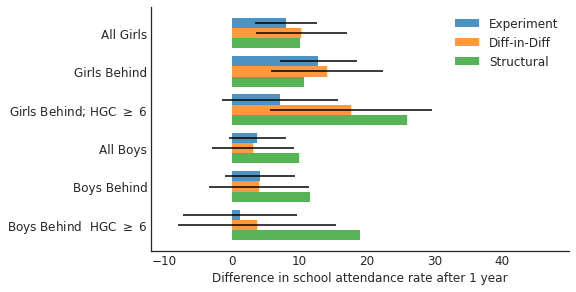

In [17]:
plt.rcParams.update({'font.size': 12})
bot = np.array(df.index) * 3
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.invert_yaxis()
errbar_experiment = np.nan_to_num(df['Experiment SE'].values)
ax.barh(bottom=bot, alpha=0.8, width=list(df['Experiment']), xerr=[list(errbar_experiment), list(errbar_experiment)])
errbar_diff = np.nan_to_num(df['Diff-in-Diff SE'].values)
ax.barh(bottom=bot + 0.8, alpha=0.8, width=list(df['Diff-in-Diff']), tick_label=df['Group'], xerr=[list(errbar_diff), list(errbar_diff)])
ax.barh(bottom=bot + 1.6, alpha=0.8, width=list(df['Predicted']))
ax.set_xlabel('Difference in school attendance rate after 1 year')
ax.set_xlim(-12, 50)
ax.set_xticks([-10, 0, 10, 20, 30, 40])
leg = ax.legend(('Experiment', 'Diff-in-Diff', 'Structural'))
make_nice(ax)
fig.savefig('table0.eps', bbox_inches='tight', dpi=300)

girls table1


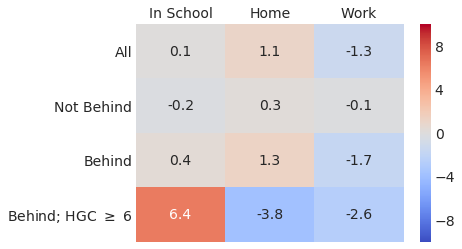

boys table1


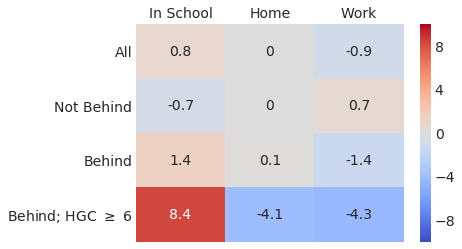

girls table2_school


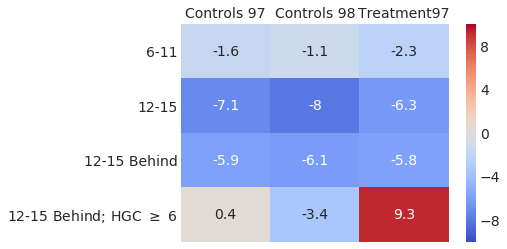

boys table2_school


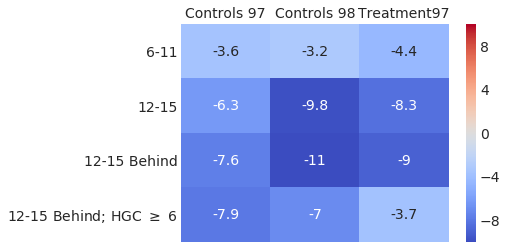

girls table2_pregnancy


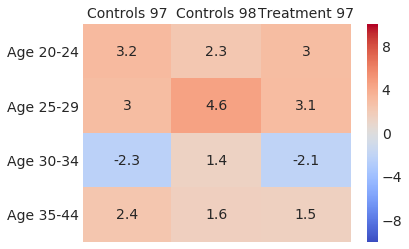

In [18]:
plt.rcParams.update({'font.size': 14})
for table in ['table1', 'table2_school', 'table2_pregnancy']: 
    for children in ['girls', 'boys']:
        if not (children == 'boys' and table.endswith('pregnancy')):
            print(children, table)
            fig, ax = plt.subplots()
            df_act = pd.read_csv('{}_{}_actual.csv'.format(table, children)).set_index('Group').astype(float)
            df_pred = pd.read_csv('{}_{}_predicted.csv'.format(table, children)).set_index('Group').astype(float)
            df = df_pred - df_act
            df.index.name = ''
            sns.heatmap(df, annot=True, center=0.0, vmin=-10, vmax=10, cmap='coolwarm')
            ax.xaxis.tick_top()
            plt.savefig('{}_{}.eps'.format(children, table), bbox_inches='tight', dpi=300)
            plt.show()
            plt.close()
            
            